# Data Science Technical Assesment Test - Ruthvika Mohan

## Step 1 : Reading dataset and displaying columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boat_data = pd.read_csv("C:\\personal\\data science\\willow.ai\\boat_info.csv")

In [3]:
boat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Boat_name          158 non-null    object 
 1   Boat_line          158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   team               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


## Step 2 : Understanding data and getting basic information, statistics about it

In [4]:
boat_data.head(5)

,Boat_name,Boat_line,Age,Tonnage,passengers,length,cabins,passenger_density,team
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [5]:
boat_data.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,team
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


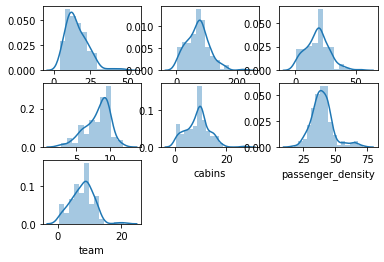

In [6]:
cols = ['Age','Tonnage','passengers','length','cabins','passenger_density','team']
for i, column in enumerate(boat_data[cols], 1):
    plt.subplot(3,3,i)
    sns.distplot(boat_data[column])

## Step 3 : Performing operations to remove features that provide no information

In [7]:
boat_data.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,team
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
team,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


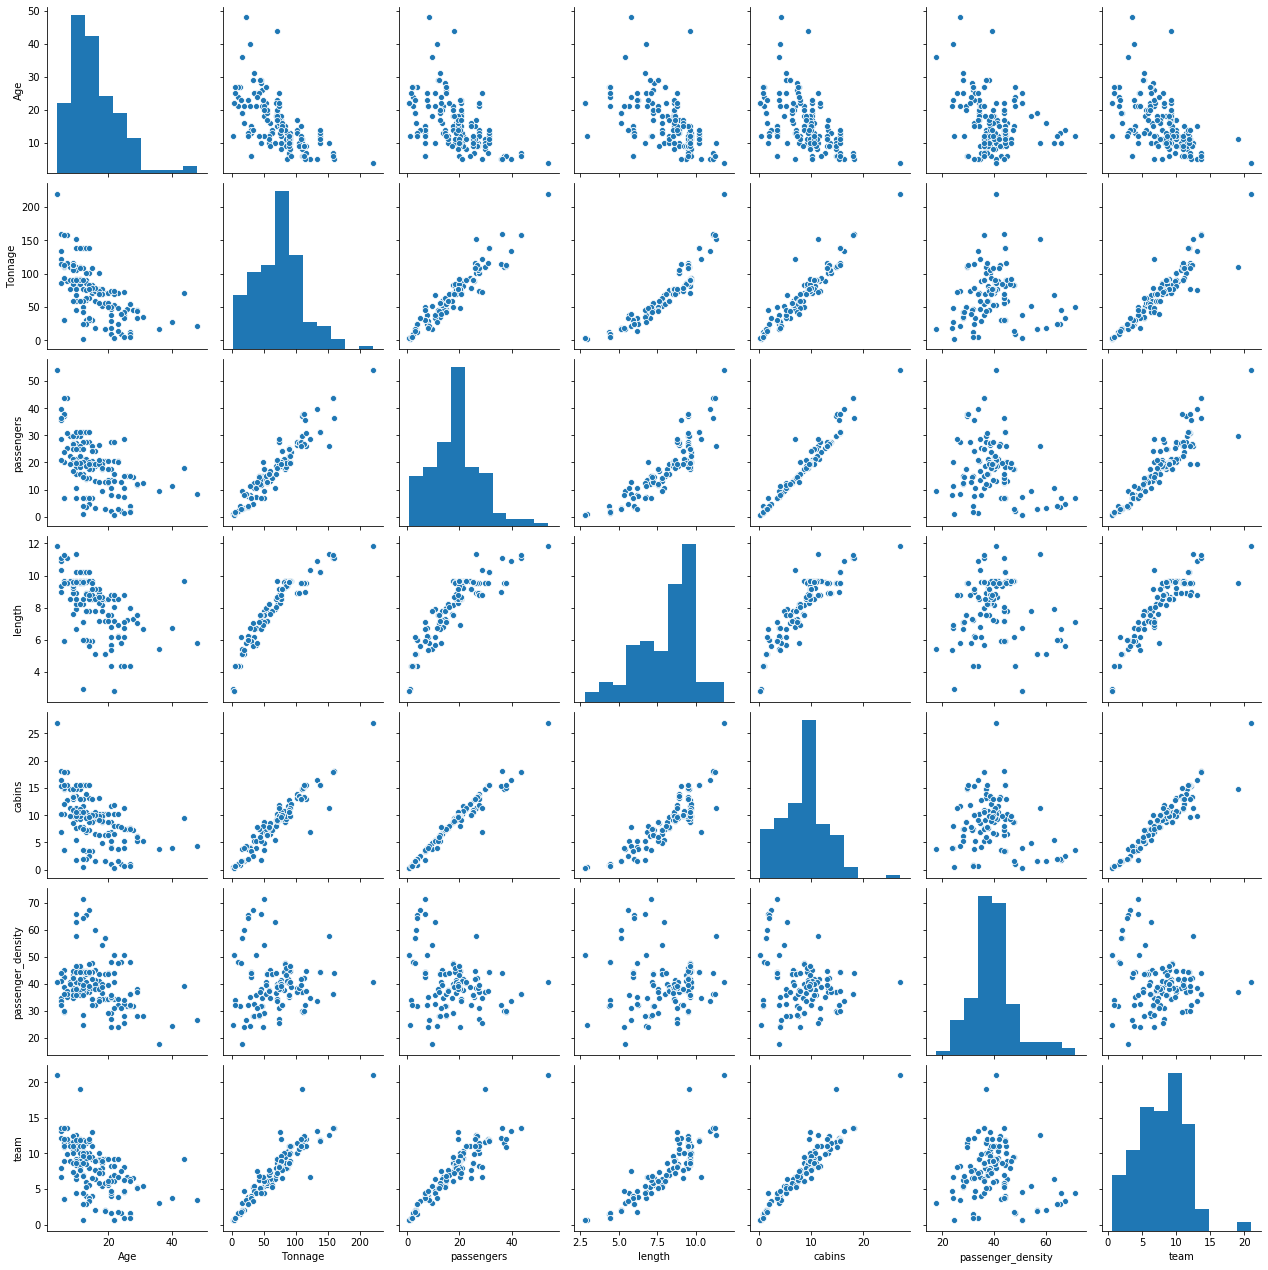

In [8]:
sns.pairplot(boat_data)

In [9]:
categorical = [x for x in boat_data.columns if x not in cols ]


In [10]:
for x in categorical:
    print(x,len(pd.unique(boat_data[x])))

Boat_name 138
Boat_line 20


In [11]:
top = boat_data['Boat_line'].value_counts()
top[:10]

Royal_Caribbean     23
Carnival            22
Princess            17
Holland_American    14
Norwegian           13
Costa               11
Celebrity           10
MSC                  8
P&O                  6
Star                 6
Name: Boat_line, dtype: int64

In [12]:
###Dropping passenger_density,'Age' because of very low correlation values,result from pairwise plot and 
### Dropping Boat name because of too many unique values
not_needed = ['passenger_density','Boat_name','Age']
boat_data = boat_data.drop(columns = not_needed)



In [13]:
cols.remove('passenger_density')
cols.remove("Age")

In [14]:
boat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Boat_line   158 non-null    object 
 1   Tonnage     158 non-null    float64
 2   passengers  158 non-null    float64
 3   length      158 non-null    float64
 4   cabins      158 non-null    float64
 5   team        158 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.5+ KB


## Step 4 : One hot encoding for categorical variable - Boat_Line

In [16]:
##One hot encoding for boat name 
import category_encoders as ce

top10 = boat_data['Boat_line'].value_counts()[:10].index

boat_data.loc[~boat_data['Boat_line'].isin(top10), 'Boat_line'] = 'OTHER'
encoder = ce.OneHotEncoder(use_cat_names=True )
boat_data_encoded = encoder.fit_transform(boat_data)
                                  
boat_data_encoded.head()

,Boat_line_OTHER,Boat_line_Carnival,Boat_line_Celebrity,Boat_line_Costa,Boat_line_Holland_American,Boat_line_MSC,Boat_line_Norwegian,Boat_line_P&O,Boat_line_Princess,Boat_line_Royal_Caribbean,Boat_line_Star,Tonnage,passengers,length,cabins,team
0,1,0,0,0,0,0,0,0,0,0,0,30.277,6.94,5.94,3.55,3.55
1,1,0,0,0,0,0,0,0,0,0,0,30.277,6.94,5.94,3.55,3.55
2,0,1,0,0,0,0,0,0,0,0,0,47.262,14.86,7.22,7.43,6.70
3,0,1,0,0,0,0,0,0,0,0,0,110.000,29.74,9.53,14.88,19.10
4,0,1,0,0,0,0,0,0,0,0,0,101.353,26.42,8.92,13.21,10.00


In [17]:
boat_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Boat_line_OTHER             158 non-null    int64  
 1   Boat_line_Carnival          158 non-null    int64  
 2   Boat_line_Celebrity         158 non-null    int64  
 3   Boat_line_Costa             158 non-null    int64  
 4   Boat_line_Holland_American  158 non-null    int64  
 5   Boat_line_MSC               158 non-null    int64  
 6   Boat_line_Norwegian         158 non-null    int64  
 7   Boat_line_P&O               158 non-null    int64  
 8   Boat_line_Princess          158 non-null    int64  
 9   Boat_line_Royal_Caribbean   158 non-null    int64  
 10  Boat_line_Star              158 non-null    int64  
 11  Tonnage                     158 non-null    float64
 12  passengers                  158 non-null    float64
 13  length                      158 non

## Step 5 : Standardization on data as scale is different for a few features

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
boat_data_encoded[cols[:-1]] = scaler.fit_transform(boat_data_encoded[cols[:-1]])

In [19]:
boat_data_encoded.head(5)

,Boat_line_OTHER,Boat_line_Carnival,Boat_line_Celebrity,Boat_line_Costa,Boat_line_Holland_American,Boat_line_MSC,Boat_line_Norwegian,Boat_line_P&O,Boat_line_Princess,Boat_line_Royal_Caribbean,Boat_line_Star,Tonnage,passengers,length,cabins,team
0,1,0,0,0,0,0,0,0,0,0,0,-1.104984,-1.193956,-1.225331,-1.184588,3.55
1,1,0,0,0,0,0,0,0,0,0,0,-1.104984,-1.193956,-1.225331,-1.184588,3.55
2,0,1,0,0,0,0,0,0,0,0,0,-0.647310,-0.372926,-0.509363,-0.314095,6.70
3,0,1,0,0,0,0,0,0,0,0,0,1.043215,1.169614,0.782736,1.357341,19.10
4,0,1,0,0,0,0,0,0,0,0,0,0.810215,0.825445,0.441533,0.982670,10.00


In [20]:
boat_data_encoded.describe()

,Boat_line_OTHER,Boat_line_Carnival,Boat_line_Celebrity,Boat_line_Costa,Boat_line_Holland_American,Boat_line_MSC,Boat_line_Norwegian,Boat_line_P&O,Boat_line_Princess,Boat_line_Royal_Caribbean,Boat_line_Star,Tonnage,passengers,length,cabins,team
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,158.000000
mean,0.177215,0.139241,0.063291,0.069620,0.088608,0.050633,0.082278,0.037975,0.107595,0.145570,0.037975,-2.136125e-16,1.756682e-16,8.713143e-16,5.621382e-18,7.794177
std,0.383065,0.347298,0.244260,0.255315,0.285080,0.219944,0.275662,0.191743,0.310853,0.353796,0.191743,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,3.503487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.858066e+00,-1.844975e+00,-2.987284e+00,-1.907008e+00,0.590000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.809653e-01,-6.139483e-01,-5.764847e-01,-6.051945e-01,5.480000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.655359e-02,1.080810e-01,2.373698e-01,1.660218e-01,8.150000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.251151e-01,6.621724e-01,7.715492e-01,4.610472e-01,9.990000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.007253e+00,3.684536e+00,2.063648e+00,4.076509e+00,21.000000


## Step 6 : Defining X and y, Splitting into test and training data

In [21]:
X = boat_data_encoded.iloc[:,:-1].values
y = boat_data_encoded.iloc[:,-1].values

In [22]:
X0 = np.ones((X.shape[0],1))
X = np.hstack((X0, X))

In [23]:
y = y.reshape(-1, 1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Step 7 : Building multiple linear regression model and checking performance

In [26]:
X.shape

(158, 16)

In [27]:
y.shape

(158, 1)

In [28]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [29]:
def error(X, y, theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - scalar
    """

    
    hypo = hypothesis(X, theta)
    err =  np.mean((hypo - y)**2)
    return err

In [30]:
def gradient(X, y, theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - (n, 1)
    """
    
    hypo = hypothesis(X, theta)
    grad = (np.dot(X.T,(hypo - y)))
    return grad/X.shape[0]

In [36]:
def gradient_descent(X, y, lr = 0.1, max_iter = 100):
    theta = np.zeros((X.shape[1], 1))
    
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        
        #Update Rule
        theta = theta - lr*grad
    
    return (theta, error_list)

In [37]:
theta,error_list = gradient_descent(X_train,y_train)

In [38]:
theta

array([[7.1080828 ],
       [0.8186863 ],
       [1.57524083],
       [0.56930877],
       [0.48411829],
       [0.37014482],
       [0.41298726],
       [1.06924373],
       [0.34285846],
       [0.97359608],
       [0.06351513],
       [0.42838311],
       [0.83047588],
       [0.5823282 ],
       [0.75897423],
       [1.30953847]])

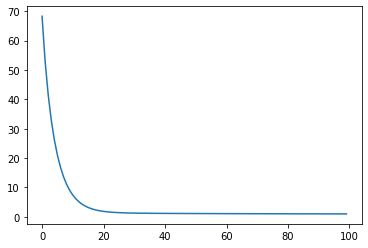

In [39]:
plt.plot(error_list)

In [40]:
y_pred = hypothesis(X_test, theta)

In [41]:
y_pred.shape

(64, 1)

In [42]:
def r2_score(Y, Y_hat):
    """
    calculates the coeff of determination.
    """
    num = np.sum((Y_hat - Y)**2)
    denom = np.sum((Y.mean() - Y)**2)
    
    return np.round((1 - num/denom)*100, decimals=2)

In [43]:
r2_score(y_test, y_pred )

92.71

## Step 8 : K-fold cross validation to check for variance issues

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

In [45]:
import math
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())
#print(all_accuracies.std()/all_accuracies.mean())
#print(all_accuracies.std()/math.sqrt(len(all_accuracies)))

[0.95076638 0.96529728 0.9397516  0.81000764 0.87506435 0.71551452
 0.96065184 0.93087388 0.99195745 0.92608599]
0.9065970944905889
0.08031794948864754


##### Our model is performing well on diverse set of data. The training and test score are both high and hence there is no bias or variance issue. Regularisation wont be necessary as pairwise plots show linear relation between target and data features. Theta values list shows that all parameters have high weightage hence all features are important. 